# <center> 02807 - Computational Tools for Data Science </center>


# <center> Week 3 <center>

# <center> Today <center>
    
 * Use **Pandas** to store and manipulate tabular data
 * Conduct **exploratory data analysis** with Pandas
 * Use **benchmarking** and **profiling** tools
 * **Optimise** Pandas code for performance



# <center> Tabular data </center>

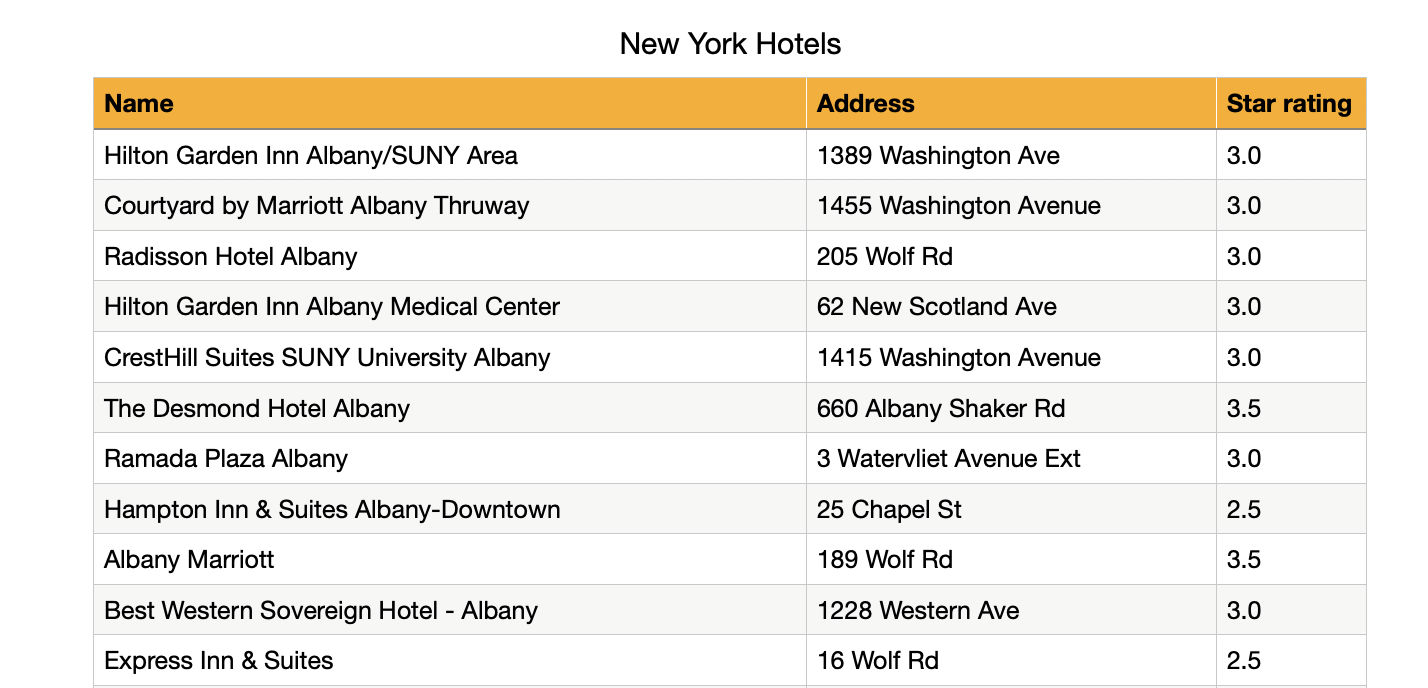

# <center> Pandas </center>

* Python library, built on top of Numpy
* High-performance, easy-to-use data structures and data analysis tools for handling tables
* Two main data structures: `Series` and `DataFrames`

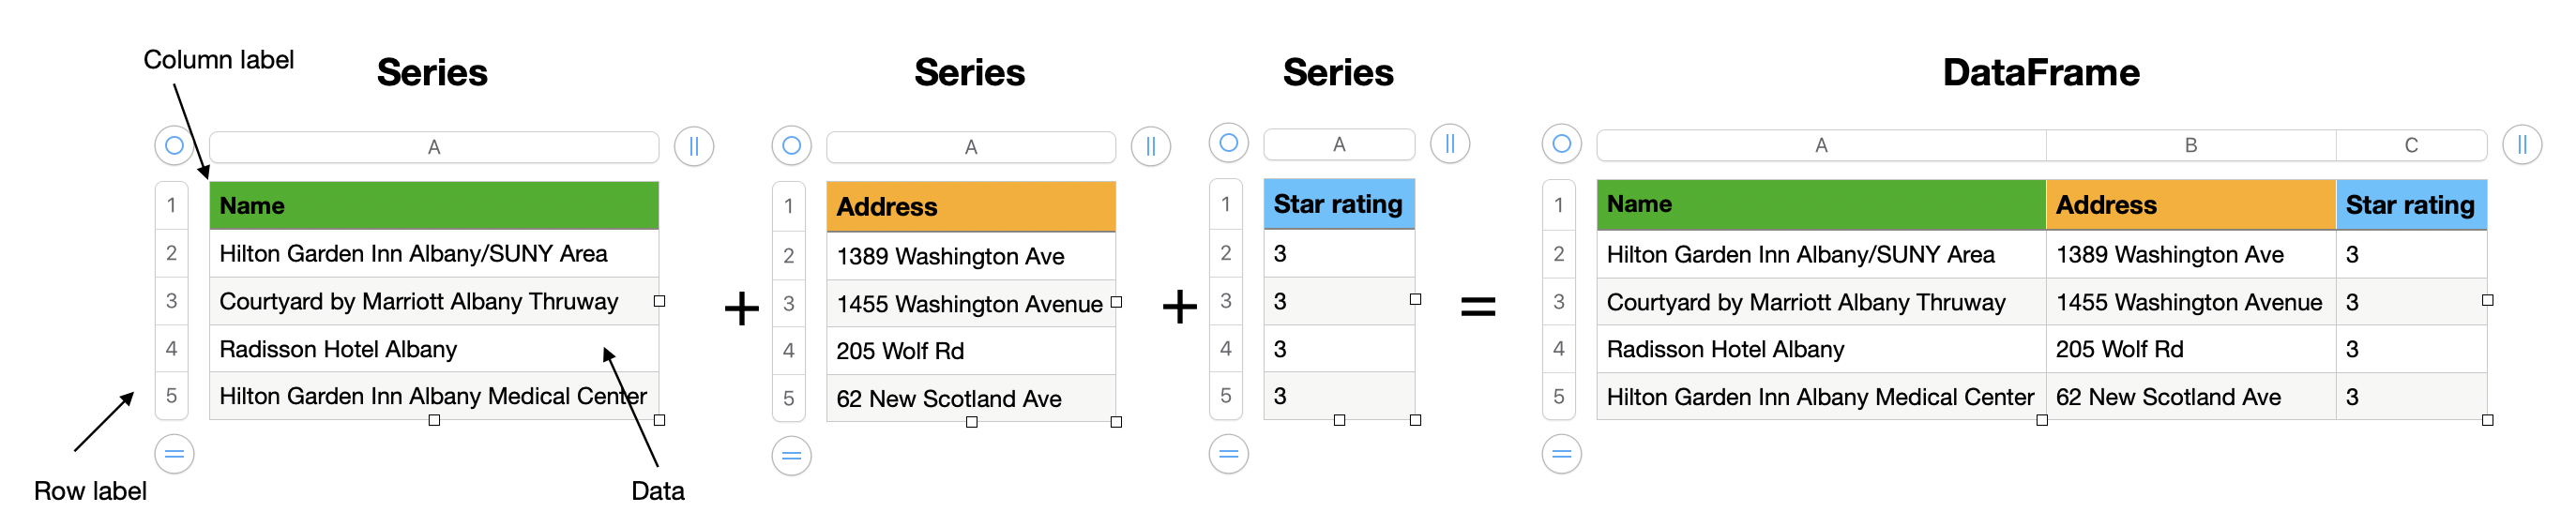


In [1]:
import numpy as np
import pandas as pd

# <center> Creating DataFrames from scratch </center>



In [2]:
# creating the Name column as a Pandas Series
s = pd.Series(["Hilton Garden Inn Albany/SUNY Area",
                         "Courtyard by Marriott Albany Thruway",
                         "Radisson Hotel Albany", 
                         "Hilton Garden Inn Albany Medical Center"],
                        name = "Name"
                         )
s

0         Hilton Garden Inn Albany/SUNY Area
1       Courtyard by Marriott Albany Thruway
2                      Radisson Hotel Albany
3    Hilton Garden Inn Albany Medical Center
Name: Name, dtype: object

In [3]:
# creating the full table as a Pandas DataFrame
data = {'Name': ["Hilton Garden Inn Albany/SUNY Area",
                  "Courtyard by Marriott Albany Thruway",
                  "Radisson Hotel Albany", 
                  "Hilton Garden Inn Albany Medical Center"],
        'Address': ["1389 Washington Ave",
                    "1455 Washington Avenue",
                    "205 Wolf Rd",
                    "62 New Scotland Ave"],
        'Star rating': [3.0,3.0,3.0,3.0]}

df = pd.DataFrame(data)
df

Name                 Address  \
0       Hilton Garden Inn Albany/SUNY Area     1389 Washington Ave   
1     Courtyard by Marriott Albany Thruway  1455 Washington Avenue   
2                    Radisson Hotel Albany             205 Wolf Rd   
3  Hilton Garden Inn Albany Medical Center     62 New Scotland Ave   

   Star rating  
0          3.0  
1          3.0  
2          3.0  
3          3.0

# <center> Reading data: New York Hotel dataset </center>

* Pandas comes with several I/O functions to read data from standard formats: csv, excel, JSON, HTML... 
* For today´s lecture, we’ll use a dataset containing information for all hotels in New York state, sourced from Expedia’s developer site.

* Data and parts of code from Sofia Heisler's great repo: [PyCon 2017: Optimizing Pandas Code for Performance](https://github.com/s-heisler/pycon2017-optimizing-pandas)

In [4]:
# read the data
url = 'https://raw.githubusercontent.com/s-heisler/pycon2017-optimizing-pandas/master/pyCon%20materials/new_york_hotels.csv'
df = pd.read_csv(url, encoding='cp1252')

# <center> Accessing data </center>

In [5]:
# What are the 10 first rows?
df.head(n=10)

ean_hotel_id                                     name  \
0        269955       Hilton Garden Inn Albany/SUNY Area   
1        113431     Courtyard by Marriott Albany Thruway   
2        108151                    Radisson Hotel Albany   
3        254756  Hilton Garden Inn Albany Medical Center   
4        198232  CrestHill Suites SUNY University Albany   
5        125200                 The Desmond Hotel Albany   
6        109728                      Ramada Plaza Albany   
7        235037     Hampton Inn & Suites Albany-Downtown   
8        106464                          Albany Marriott   
9        106922    Best Western Sovereign Hotel - Albany   

                  address1    city state_province postal_code  latitude  \
0      1389 Washington Ave  Albany             NY       12206  42.68751   
1   1455 Washington Avenue  Albany             NY       12206  42.68971   
2              205 Wolf Rd  Albany             NY       12205  42.72410   
3      62 New Scotland Ave  Albany             NY       12208  42.65157   
4   1415 Washington Avenue  Albany             NY       12206  42.68873   
5     660 Albany Shaker Rd  Albany             NY       12211  42.72874   
6  3 Watervliet Avenue Ext  Albany             NY       12206  42.68031   
7             25 Chapel St  Albany             NY       12210  42.65334   
8              189 Wolf Rd  Albany             NY       12205  42.72111   
9         1228 Western Ave  Albany             NY       12203  42.67807   

   longitude  star_rating  high_rate  low_rate  
0  -73.81643          3.0   154.0272  124.0216  
1  -73.82021          3.0   179.0100  134.0000  
2  -73.79822          3.0   134.1700   84.1600  
3  -73.77638          3.0   308.2807  228.4597  
4  -73.81854          3.0   169.3900   89.3900  
5  -73.79807          3.5   189.0266  153.0644  
6  -73.78444          3.0   158.6321   89.0360  
7  -73.75142          2.5   225.4700  224.4700  
8  -73.80036          3.5   158.8856  128.9077  
9  -73.82819          3.0   139.0244   78.3255

In [6]:
# check basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1631 entries, 0 to 1630
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ean_hotel_id    1631 non-null   int64  
 1   name            1631 non-null   object 
 2   address1        1631 non-null   object 
 3   city            1631 non-null   object 
 4   state_province  1631 non-null   object 
 5   postal_code     1631 non-null   object 
 6   latitude        1631 non-null   float64
 7   longitude       1631 non-null   float64
 8   star_rating     1630 non-null   float64
 9   high_rate       1631 non-null   float64
 10  low_rate        1631 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 140.3+ KB


In [7]:
# get hotel names
df.name

0                     Hilton Garden Inn Albany/SUNY Area
1                   Courtyard by Marriott Albany Thruway
2                                  Radisson Hotel Albany
3                Hilton Garden Inn Albany Medical Center
4                CrestHill Suites SUNY University Albany
                              ...                       
1626            Residence Inn Yonkers Westchester County
1627                                  Ramada Inn Yonkers
1628                        Hyatt Place New York/Yonkers
1629          Hampton Inn & Suites Yonkers - Westchester
1630    Courtyard by Marriott Yonkers Westchester County
Name: name, Length: 1631, dtype: object

In [14]:
# check all 5-star hotels in Brooklyn (boolean indexing)
df[(df.star_rating == 5) & (df.city == 'Brooklyn')]

ean_hotel_id                     name               address1      city  \
185        556612   The William Vale Hotel  111 North 12th Street  Brooklyn   
191        606740  1 Hotel Brooklyn Bridge       60 Furman Street  Brooklyn   

    state_province postal_code  latitude  longitude  star_rating  high_rate  \
185             NY       11249  40.72243  -73.95730          5.0     659.37   
191             NY       11201  40.70164  -73.99553          5.0     893.13   

     low_rate  
185    299.37  
191    297.00

In [15]:
# what are the 10 most expensive hotels?
df.sort_values(by=['high_rate'],ascending=False).head(10)

ean_hotel_id                                               name  \
1113        532245                         Safehouse Suites Manhattan   
1074        183435         The Towers of the Waldorf Astoria New York   
901         383834                                     Dream Downtown   
1012        129023                      The Carlyle, A Rosewood Hotel   
1064        131734                        Four Seasons Hotel New York   
1067        211803                        Mandarin Oriental, New York   
1076        106256            The Ritz-Carlton New York, Central Park   
1082        117020                                           The Mark   
1062        356439  The Chatwal, a Luxury Collection Hotel, New Yo...   
1050        105314                                    The Plaza Hotel   

                                address1      city state_province postal_code  \
1113                       1600 Broadway  New York             NY       10019   
1074                       100 E 50th St  New York             NY       10022   
901                        355 W 16th St  New York             NY       10011   
1012                        35 E 76th St  New York             NY       10021   
1064                    57 E 57th Street  New York             NY       10022   
1067   80 Columbus Circle at 60th Street  New York             NY       10023   
1076                   50 Central Park S  New York             NY       10019   
1082          Madison Ave at 77th Street  New York             NY       10075   
1062                  130 W. 44th Street  New York             NY       10036   
1050  Fifth Avenue at Central Park South  New York             NY       10019   

      latitude  longitude  star_rating   high_rate   low_rate  
1113  40.76037  -73.98467          5.0  10888.5000  5990.2500  
1074  40.75691  -73.97335          5.0  10000.0000  1099.0000  
901   40.74195  -74.00369          4.5   5000.3501   299.3600  
1012  40.77461  -73.96338          5.0   4100.0400   730.0300  
1064  40.76197  -73.97158          5.0   4061.2090  4060.2090  
1067  40.76919  -73.98283          5.0   3993.4500   694.7334  
1076  40.76552  -73.97589          5.0   3495.5322   695.0901  
1082  40.77515  -73.96343          5.0   3488.4800   518.4700  
1062  40.75668  -73.98445          5.0   3406.3999   695.3900  
1050  40.76424  -73.97388          5.0   3225.1599   725.1700

In [16]:
# what are the 5 most affordable hotel with at least 3.5 stars?
df[(df.star_rating > 3.5)].sort_values(by=['low_rate']).head(5)

ean_hotel_id                                      name  \
829         150310                        NYLO New York City   
1435        222582              Gideon Putnam Resort And Spa   
1132        477741  Holiday Inn Manhattan-Financial District   
1602        566642  Global Luxury Apartments in White Plains   
1245        543603                                Time Nyack   

                        address1              city state_province postal_code  \
829   2178 Broadway at W 77th St          New York             NY       10024   
1435         24 Gideon Putnam Rd  Saratoga Springs             NY       12866   
1132            99 Washington St          New York             NY       10006   
1602              15 Bank Street      White Plains             NY       10606   
1245             400 High Avenue             Nyack             NY       10960   

      latitude  longitude  star_rating  high_rate  low_rate  
829   40.78225  -73.98025          4.0   158.9340  108.9535  
1435  43.05784  -73.79818          4.0   199.0000  119.0000  
1132  40.70833  -74.01436          4.0   168.9669  123.9754  
1602  41.03150  -73.77401          4.0   175.2200  125.1500  
1245  41.09459  -73.92995          4.0   249.0000  129.0000

# Exploratory data analysis

In [17]:
# What's the average star rating?
df['star_rating'].mean()

2.8947852760736197

In [19]:
# What's the average low rate price in Brooklyn?
df[df.city == 'Brooklyn']['low_rate'].mean()

173.01858219178084

In [20]:
# How many hotels are there in each city?
df['city'].value_counts().to_frame()

city
New York             401
Brooklyn              73
Rochester             45
Albany                39
Niagara Falls         39
...                  ...
Port Jervis            1
Milton                 1
Margaretville          1
Cold Spring Harbor     1
McGraw                 1

[316 rows x 1 columns]

In [22]:
# Group the dataframe by city and postal code and extract stats for price rates and star ratings
df.groupby(['city','postal_code']).agg(
    {'star_rating': ['count', 'mean'],  # get the count and mean of star ratings
     'high_rate': ['mean','max']
    }
)


star_rating             high_rate          
                            count      mean        mean       max
city      postal_code                                            
Albany    12203                 4  2.625000  163.203600  189.1600
          12205                19  2.500000  125.023416  194.3000
          12206                 8  2.687500  142.941250  179.0800
          12207                 4  3.000000  226.954400  329.0349
          12208                 1  3.000000  308.280700  308.2807
...                           ...       ...         ...       ...
Woodstock 12498                 1  3.000000  250.205700  250.2057
Wurtsboro 12790                 1  2.000000  184.000000  184.0000
Yonkers   10701                 3  2.833333  146.129967  269.3600
          10704                 1  3.000000  249.310000  249.3100
          10710                 3  2.833333  159.396667  189.1900

[469 rows x 4 columns]

In [23]:
# You can also use the pivot table function for similar results
df.pivot_table(['star_rating', 'low_rate', 'high_rate'],
               ['city','postal_code'], aggfunc={'star_rating': ['count', 'mean'],  # get the count and mean of star ratings
                                                'low_rate': ['mean'],
                                                'high_rate': ['mean']})

high_rate    low_rate star_rating          
                             mean        mean       count      mean
city      postal_code                                              
Albany    12203        163.203600  114.631375           4  2.625000
          12205        125.023416   92.745279          19  2.500000
          12206        142.941250  104.361788           8  2.687500
          12207        226.954400  166.951325           4  3.000000
          12208        308.280700  228.459700           1  3.000000
...                           ...         ...         ...       ...
Woodstock 12498        250.205700  139.114500           1  3.000000
Wurtsboro 12790        184.000000  105.400000           1  2.000000
Yonkers   10701        146.129967  106.127567           3  2.833333
          10704        249.310000  199.310000           1  3.000000
          10710        159.396667  137.393333           3  2.833333

[469 rows x 4 columns]

<AxesSubplot:>

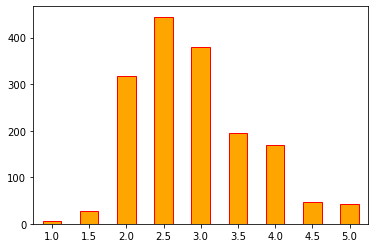

In [24]:
# How many hotel are there for each star rating?
df['star_rating'].value_counts().sort_index().plot.bar(rot=0,color='orange',edgecolor='r')

In [27]:
# How correlated are the values of 2 colums (Pearson correlation coefficient)?
col1 = df['star_rating']
col2 = df['high_rate']
col1.corr(col2)

0.4578312614942432

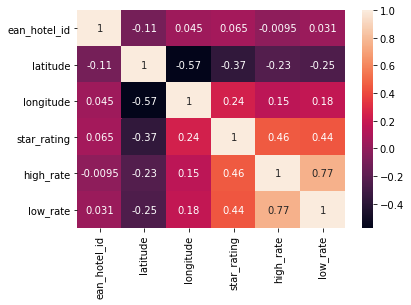

In [29]:
# Get a heat-map visualisation of the correlation matrix
# between all variables
# what are some meaningful correlations?

import seaborn as sn
import matplotlib.pyplot as plt

corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

# <center> Benchmarking and profiling </center>


* **Benchmarking**: running a computer program in order to assess *relative performance*, normally by running a number of standard tests and trials against it. Example: `%timeit`. ([Source](https://en.wikipedia.org/wiki/Profiling_(computer_programming))).

* **Profiling**: measuring, for example, the space or time complexity of a program, the usage of particular instructions, or the frequency and duration of function calls. Profiling information serves to aid program optimization. ([Source](https://en.wikipedia.org/wiki/Profiling_(computer_programming))).

* Chapter 1 of Python Data Science Handbook has a good section on benchmarking and profiling in Python notebooks.

# <center> Benchmarking example </center>

Let's define a normalisation function, which we'll apply to the `high_rate` column of the NYC hotel dataset. The details of the function are unimportant; we just want an function to perform benchmarking and profiling on.

In [36]:
def normalise(df, pd_series):
    pd_series = pd_series.astype(float)

    # Find upper and lower bound for outliers
    avg = np.mean(pd_series)
    sd  = np.std(pd_series)
    lower_bound = avg - 2*sd
    upper_bound = avg + 2*sd

    # Collapse in the outliers
    df.loc[pd_series < lower_bound , "cutoff_rate" ] = lower_bound
    df.loc[pd_series > upper_bound , "cutoff_rate" ] = upper_bound

    # Finally, take the log
    normalised_price = np.log(df["cutoff_rate"].astype(float))
    
    return normalised_price

Timing the normalisation function.

In [37]:
%timeit normalise(df, df['high_rate'])

1.16 ms ± 25 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Profiling the normalisation function.

In [38]:
!pip install line_profiler
%load_ext line_profiler

  ERROR: Command errored out with exit status 1:
   command: 'f:\anaconda\python.exe' 'f:\anaconda\lib\site-packages\pip\_vendor\pep517\_in_process.py' build_wheel 'C:\Users\matth\AppData\Local\Temp\tmph6q7e_sm'
       cwd: C:\Users\matth\AppData\Local\Temp\pip-install-tsk3xnyk\line-profiler
  Complete output (223 lines):
  Not searching for unused variables given on the command line.
  CMake Error at C:/Users/matth/AppData/Local/Temp/pip-build-env-8gmh1mzz/overlay/Lib/site-packages/cmake/data/share/cmake-3.18/Modules/CMakeDetermineCompilerId.cmake:689 (file):
    file STRINGS file
    "C:/Users/matth/AppData/Local/Temp/pip-install-tsk3xnyk/line-profiler/_cmake_test_compile/build/CMakeFiles/3.18.2/CompilerIdC/a.exe"
    cannot be read.
  Call Stack (most recent call first):
    C:/Users/matth/AppData/Local/Temp/pip-build-env-8gmh1mzz/overlay/Lib/site-packages/cmake/data/share/cmake-3.18/Modules/CMakeDetermineCompilerId.cmake:38 (CMAKE_DETERMINE_COMPILER_ID_CHECK)
    C:/Users/matth/App

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
Failed to build line-profiler


ModuleNotFoundError: No module named 'line_profiler'

In [39]:
%lprun -f normalise normalise(df, df['high_rate'])

UsageError: Line magic function `%lprun` not found.


# <center> How to optimise Pandas code </center>



*   Very large performance variations possible (as with NumPy)
*   We'll look at what you should and **should not** do when working with Pandas. 







We’ll compare the efficiency of several methodologies for applying a function to a Pandas DataFrame. 

From slowest to fastest:
1. Basic looping over DataFrame rows one at a time
2. Looping with `iterrows()`
3. Looping with `apply()`
4. Vectorization with Pandas series
5. Vectorization with NumPy arrays

# <center> Panda's documentation is pretty clear about it <center>

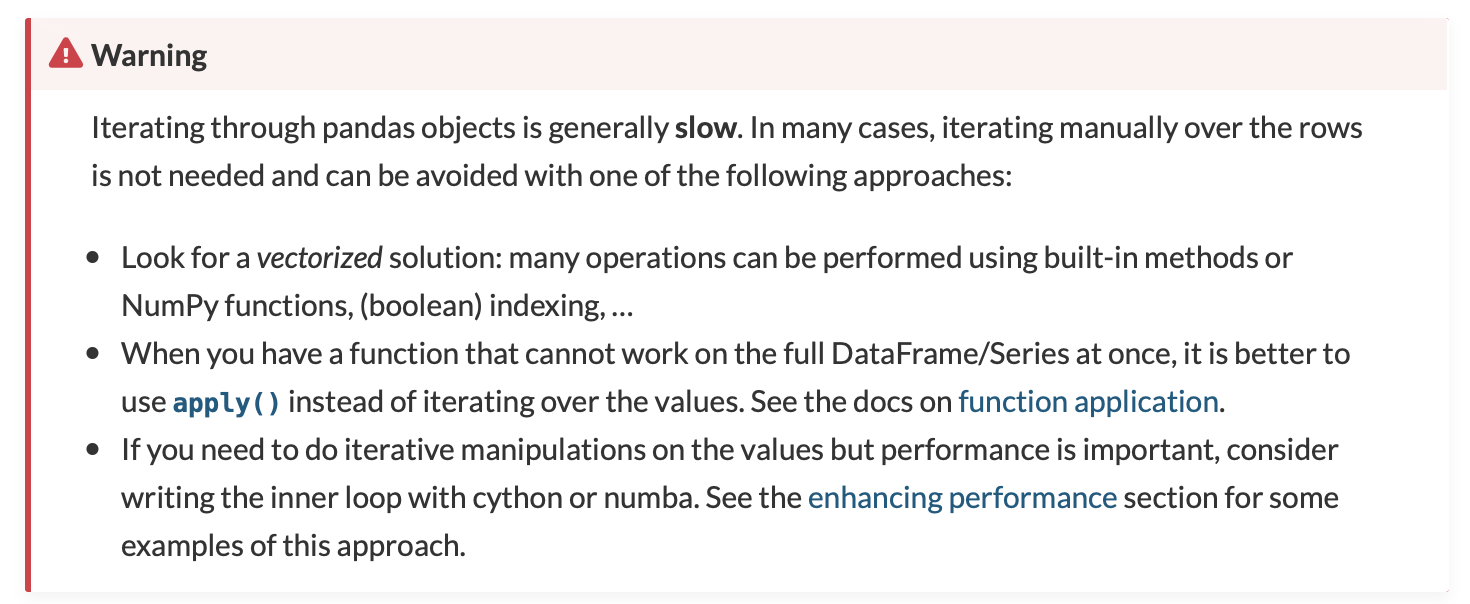

# <center> Example: finding distances to NYC hotels </center>

Problem definition.

*   **Given**: a location, specified by a pair `(longitude, latitude)` of coordinates;
*   **Find**: the distance from the given location to all NYC hotel locations (given again by their coordinates)



More specifically, we'll compute distances with the **Haversine formula**.

The Haversine formula approximates the shortest distance between two points, taking into account the earth's curvature. 

Here's a definition of the formula, which takes two coordinate points, `(lat1,lon1)`and `(lat2,lon2)` as inputn, and returns the distance `mi`.


In [40]:
def haversine(lat1, lon1, lat2, lon2):
    miles_constant = 3959
    lat1, lon1, lat2, lon2 = map(np.deg2rad, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1 
    dlon = lon2 - lon1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    mi = miles_constant * c
    return mi

* We'll illustrate the performance differences between the 5 methodologies mentioned above on our distance computation problem.

* Let's start by creating a Pandas series to store the timings for the different solutions. 

In [41]:
timing_data = {
        'Best single run time (s)': np.nan,
        'Marginal performance improvement': np.nan,
        'Performance improvement over basic looping': np.nan}

timings = pd.DataFrame(timing_data,index=["Basic looping", "Iterrows looping", "Apply()", "Pandas vectorisation", "NumPy vectorisation"])
timings

Best single run time (s)  \
Basic looping                              NaN   
Iterrows looping                           NaN   
Apply()                                    NaN   
Pandas vectorisation                       NaN   
NumPy vectorisation                        NaN   

                      Marginal performance improvement  \
Basic looping                                      NaN   
Iterrows looping                                   NaN   
Apply()                                            NaN   
Pandas vectorisation                               NaN   
NumPy vectorisation                                NaN   

                      Performance improvement over basic looping  
Basic looping                                                NaN  
Iterrows looping                                             NaN  
Apply()                                                      NaN  
Pandas vectorisation                                         NaN  
NumPy vectorisation                                          NaN

# <center> 1. Basic looping (the big no-no)</center>

* "I'm just gonna loop over all the rows!".
* Recall: Pandas is built on top of NumPy. Designed for vector manipulation. Loops are slow.
* I.e.: basic looping doesn't take advantage of any built-in optimizations, making it extremely inefficient.

In [42]:
# Manually loop over all rows to return all distances from (40.671, -73.985) to each NYC hotel
def haversine_looping(df):
    distance_list = []
    for i in range(0, len(df)):
        d = haversine(40.671, -73.985, df.iloc[i]['latitude'], df.iloc[i]['longitude'])
        distance_list.append(d)
    return distance_list

In [43]:
# Timing the haversine_looping function
haversine_looping_time = %timeit -o haversine_looping(df)

409 ms ± 10.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [44]:
# store timing result in data frame
timings.at['Basic looping'] = [haversine_looping_time.best,0.0,0.0]
timings

Best single run time (s)  \
Basic looping                         0.391998   
Iterrows looping                           NaN   
Apply()                                    NaN   
Pandas vectorisation                       NaN   
NumPy vectorisation                        NaN   

                      Marginal performance improvement  \
Basic looping                                      0.0   
Iterrows looping                                   NaN   
Apply()                                            NaN   
Pandas vectorisation                               NaN   
NumPy vectorisation                                NaN   

                      Performance improvement over basic looping  
Basic looping                                                0.0  
Iterrows looping                                             NaN  
Apply()                                                      NaN  
Pandas vectorisation                                         NaN  
NumPy vectorisation                                          NaN

In [45]:
# Profiling the haversine looping function
%lprun -f haversine_looping haversine_looping(df)

UsageError: Line magic function `%lprun` not found.


# <center> 2. "Less bad" looping with `iterrows` </center>

* "Okay... But I still want to use iteration".
* Sometimes operations cannot be vectorised. 
* Use in-built, optimised iterators for DataFrames. There's also `itertuples()`, `pd.loc[]/pd.iloc[]`, etc.
* Still inefficient, should be your last resort.  It's still an iterative process with one-row-at-a-time operations. Not taking advantage vectorisation (computing things in parallel, locality, etc.).


In [48]:
# Haversine applied on rows via iterrows iteration
def haversine_iterrows(df):
  distance_list = []
  for index, row in df.iterrows():
    d = haversine(40.671, -73.985, row['latitude'], row['longitude'])
    distance_list.append(d)
  return distance_list

In [47]:
# Timing the haversine_iterrows function
haversine_iterrows_time = %timeit -o haversine_iterrows(df)

131 ms ± 2.23 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [49]:
# store timing result in data frame
timings.at['Iterrows looping'] = [haversine_iterrows_time.best, 
                                  "{:.1f}x".format(haversine_looping_time.best/haversine_iterrows_time.best),
                                  "{:.1f}x".format(haversine_looping_time.best/haversine_iterrows_time.best)] 
timings

Best single run time (s)  \
Basic looping                         0.391998   
Iterrows looping                      0.128023   
Apply()                                    NaN   
Pandas vectorisation                       NaN   
NumPy vectorisation                        NaN   

                     Marginal performance improvement  \
Basic looping                                       0   
Iterrows looping                                 3.1x   
Apply()                                           NaN   
Pandas vectorisation                              NaN   
NumPy vectorisation                               NaN   

                     Performance improvement over basic looping  
Basic looping                                                 0  
Iterrows looping                                           3.1x  
Apply()                                                     NaN  
Pandas vectorisation                                        NaN  
NumPy vectorisation                                         NaN

In [ ]:
# Profiling the haversine iterrows function
%lprun -f haversine_iterrows haversine_iterrows(df)

# <center> 3. `apply()` haversine on rows </center>

* Applies a function along an axis of the DataFrame.

* Although `apply()` also inherently loops through rows, it is often much more efficient than `iterrows()` because it takes advantage of several internal optimizations, such as using iterators in Cython. 

* Operations in Cython space are generally much faster (Cython can be compiled into C for fast operations).



In [51]:
# use apply and lambda
def haversine_apply(df):
  return df.apply(lambda row: haversine(40.671, -73.985,\
                               row['latitude'], row['longitude']), axis=1)

In [52]:
haversine_apply_time = %timeit -o haversine_apply(df)

40.7 ms ± 1.99 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [53]:
# store timing result in data frame
timings.at['Apply()'] = [haversine_apply_time.best, 
                         "{:.1f}x".format(haversine_iterrows_time.best/haversine_apply_time.best),
                         "{:.1f}x".format(haversine_looping_time.best/haversine_apply_time.best)] 
timings

Best single run time (s)  \
Basic looping                         0.391998   
Iterrows looping                      0.128023   
Apply()                               0.038552   
Pandas vectorisation                       NaN   
NumPy vectorisation                        NaN   

                     Marginal performance improvement  \
Basic looping                                       0   
Iterrows looping                                 3.1x   
Apply()                                          3.3x   
Pandas vectorisation                              NaN   
NumPy vectorisation                               NaN   

                     Performance improvement over basic looping  
Basic looping                                                 0  
Iterrows looping                                           3.1x  
Apply()                                                   10.2x  
Pandas vectorisation                                        NaN  
NumPy vectorisation                                         NaN

Let's check the profiling info for the `apply` version of the haversine distance computation. 


In [ ]:
# Profiling the haversine apply function
%lprun -f haversine df.apply(lambda row: haversine(40.671, -73.985, row['latitude'], row['longitude']), axis=1)

We can extract some useful info.

* the trigonometric calculations account for nearly half of the total runtime. If we were looking to optimize individual components of the function, this would be a good place to start. 

* Main take-away: each line is still being hit 1631 times - `apply()` still iterates over each row. 


* If we cut down on the amount of repetitive work being done (**parallelise**!), we could speed-up execution.

## 4. Vectorised implementation of Haversine applied on Pandas series

Let's look at a vectorised solution now.

In [54]:
# Vectorised implementation of Haversine applied on Pandas series
def haversine_vecpandas(df):
  return haversine(40.671, -73.985, df['latitude'], df['longitude'])

In [55]:
haversine_vecpandas_time = %timeit -o haversine_vecpandas(df)

1.31 ms ± 19.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [56]:
# store timing result in data frame
timings.at['Pandas vectorisation'] = [haversine_vecpandas_time.best, 
                                      "{:.1f}x".format(haversine_iterrows_time.best/haversine_vecpandas_time.best),
                                      "{:.1f}x".format(haversine_looping_time.best/haversine_vecpandas_time.best)] 
timings

Best single run time (s)  \
Basic looping                         0.391998   
Iterrows looping                      0.128023   
Apply()                               0.038552   
Pandas vectorisation                  0.001278   
NumPy vectorisation                        NaN   

                     Marginal performance improvement  \
Basic looping                                       0   
Iterrows looping                                 3.1x   
Apply()                                          3.3x   
Pandas vectorisation                           100.1x   
NumPy vectorisation                               NaN   

                     Performance improvement over basic looping  
Basic looping                                                 0  
Iterrows looping                                           3.1x  
Apply()                                                   10.2x  
Pandas vectorisation                                     306.6x  
NumPy vectorisation                                         NaN

# <center> Vectorisation to the rescue! </center>

* Now we are operating simultaneously on entire arrays, instead of sequentially on individual values (scalars). 

* Recall: this is called vectorisation - the process of executing operations on entire arrays.

* The previous distance computation functions had been passing scalars to the haversine function. 

* **All of the functions being used within the `haversine` function** (trig funs, multiplication, etc.) **are also able to operate on arrays**. 

* Vectorising the distance function is simple: instead of passing individual scalar values for latitude and longitude to it, we pass the entire series (columns). 

* **Pandas exploits a set of optimisations available for vectorised functions**: especially, parallelisation.




* We’ve achieved staggering improvements over both the `apply()` and `iterrows()` methods  by vectorising the function — and we didn’t need to do anything but change the input type!

* Let's look the profiling info:

In [ ]:
# vectorised implementation of haversine
# notice how every line is only hit once
%lprun -f haversine haversine(40.671, -73.985,df['latitude'], df['longitude'])


* Whereas `apply()` was hitting the function 1631 times, the vectorised version  applies the function exactly once, to the entire array simultaneously. That’s where the serious time savings are coming from (parallelisation, etc.).

#  <center> 5. Vectorized implementation of Haversine applied on NumPy arrays </center>


* As long as we are vectorising whenevever we can, we are using Pandas in the correct way...

* ... but if speeding-up is important, we can get very significant improvements with NumPy. Pandas still incurs some overhead due to type-checking, indexing, etc.

* **By adding `.values` to a Panda Series, we get a Numpy array**:


In [57]:
# Vectorised implementation of Haversine applied on Pandas series
# just added .values to df['latitude'] and df['longitude']
def haversine_vecnumpy(df):
  return haversine(40.671, -73.985, df['latitude'].values, df['longitude'].values)

In [58]:
haversine_vecnumpy_time = %timeit -o haversine_vecnumpy(df)

70.8 µs ± 1.42 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [60]:
# store timing result in data frame
timings.at['NumPy vectorisation'] = [haversine_vecpandas_time.best, 
                                      "{:.1f}x".format(haversine_vecpandas_time.best/haversine_vecnumpy_time.best),
                                      "{:.1f}x".format(haversine_looping_time.best/haversine_vecnumpy_time.best)] 
timings

Best single run time (s)  \
Basic looping                         0.391998   
Iterrows looping                      0.128023   
Apply()                               0.038552   
Pandas vectorisation                  0.001278   
NumPy vectorisation                   0.001278   

                     Marginal performance improvement  \
Basic looping                                       0   
Iterrows looping                                 3.1x   
Apply()                                          3.3x   
Pandas vectorisation                           100.1x   
NumPy vectorisation                             18.7x   

                     Performance improvement over basic looping  
Basic looping                                                 0  
Iterrows looping                                           3.1x  
Apply()                                                   10.2x  
Pandas vectorisation                                     306.6x  
NumPy vectorisation                                     5748.5x

* Let's look at the profiling info when the haversine function is computed on NumPy arrays rather than Pandas rows. 

* As we can see, the distribution of time over code lines is similar to the one in the Pandas-based vectorisation. 

* But operations are much cheaper over NumPy arrays.

In [ ]:
%lprun -f haversine df['distance'] = haversine(40.671, -73.985,\
                        df['latitude'].values, df['longitude'].values)

# <center> Practical take-away </center>

*   Pandas is great for working with tabular data
*   Many in-built functions for exploratory data analysis
*   However, avoid loops
*   If you really need loops, use `apply()`, instead of iteration functions
*   Vectorisation is often much faster than scalar operations
*   Vectorisation on NumPy arrays is faster than on Pandas series

Also... If you want to dig deeper:

* If you really need  `apply()` or iterators, [use Cython](https://cython.readthedocs.io/en/latest/src/tutorial/cython_tutorial.html) or [numba](https://numba.pydata.org/numba-doc/latest/user/5minguide.html) to speed them up

